## “This project predicts whether a telecom customer will churn (leave the company) or stay, based on their usage behavior, services, and contract details.”

## Goal: Help the telecom company reduce customer loss by identifying at-risk customers early.

In [ ]:
#It gives the company insights into which customers and services are most at risk, allowing them to take proactive retention steps.”

## Import Liabraries

In [61]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load dataset

In [1]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

NameError: name 'pd' is not defined

In [67]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [64]:
df.shape

(7043, 24)

In [66]:
df.isnull().sum()

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
Tenure In years           0
Customer Churn Counter    0
Total counter             0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   gender                  7043 non-null   object 
 2   SeniorCitizen           7043 non-null   int64  
 3   Partner                 7043 non-null   object 
 4   Dependents              7043 non-null   object 
 5   tenure                  7043 non-null   int64  
 6   PhoneService            7043 non-null   object 
 7   MultipleLines           7043 non-null   object 
 8   InternetService         7043 non-null   object 
 9   OnlineSecurity          7043 non-null   object 
 10  OnlineBackup            7043 non-null   object 
 11  DeviceProtection        7043 non-null   object 
 12  TechSupport             7043 non-null   object 
 13  StreamingTV             7043 non-null   object 
 14  StreamingMovies         7043 non-null   

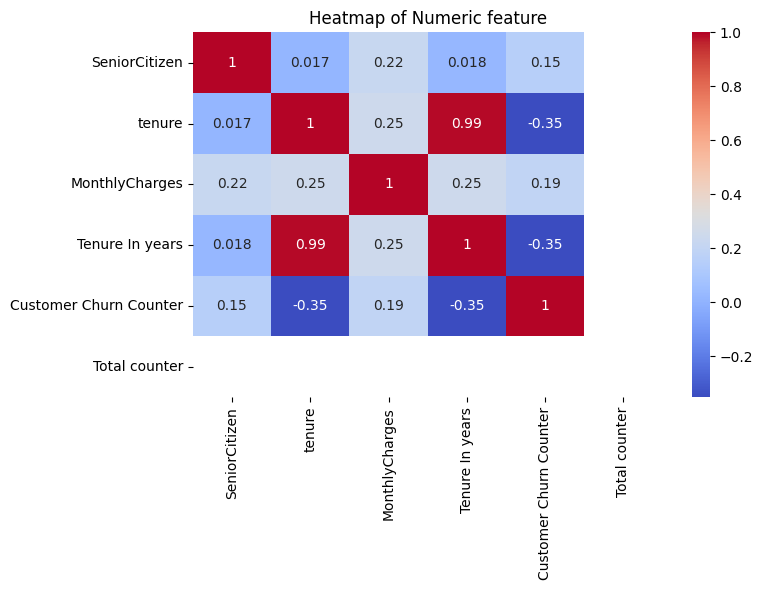

In [35]:
df_numeric = df.select_dtypes(include='number')

corr = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Heatmap of Numeric feature')
plt.tight_layout()
plt.show()


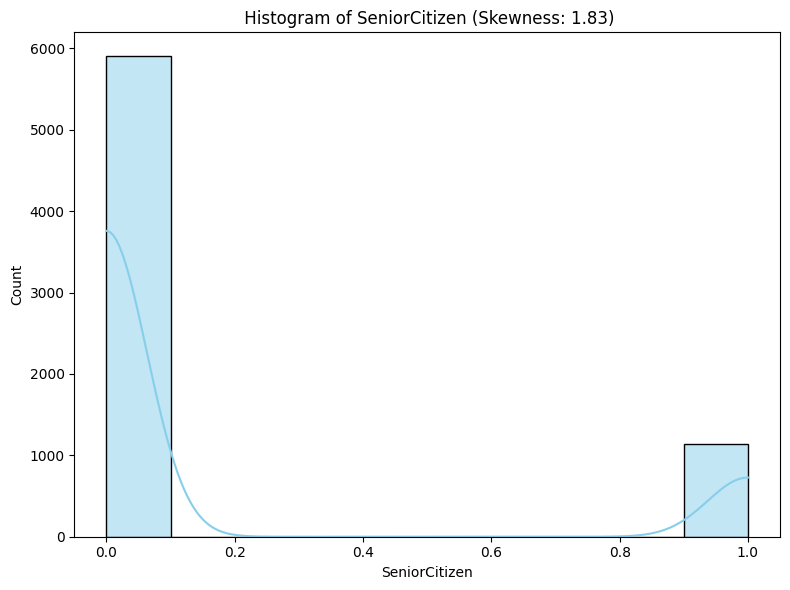

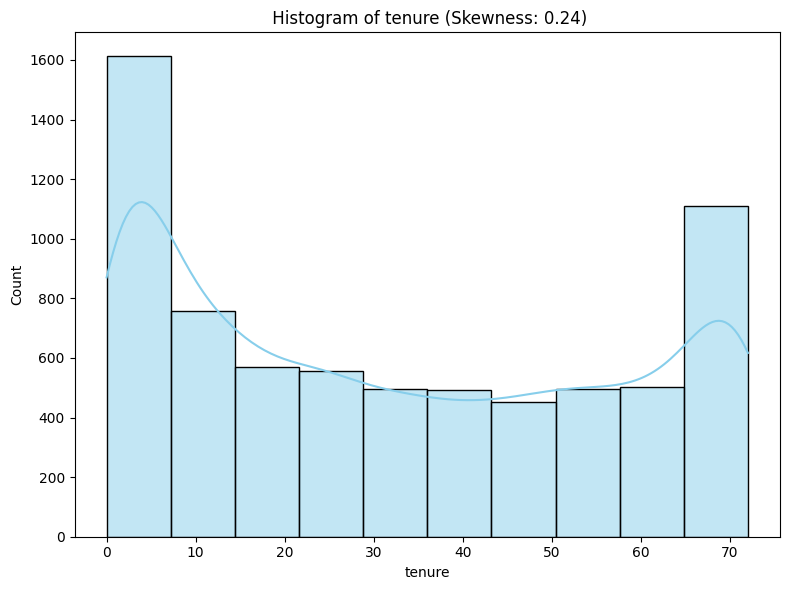

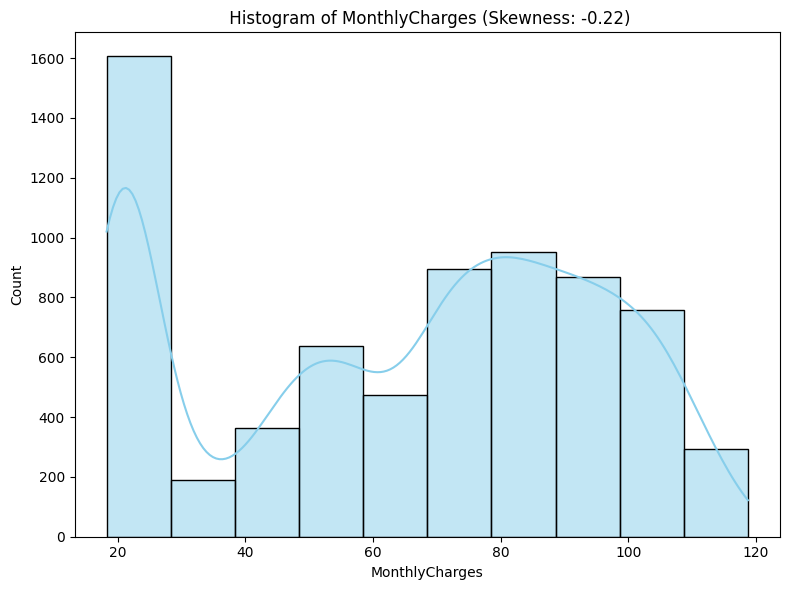

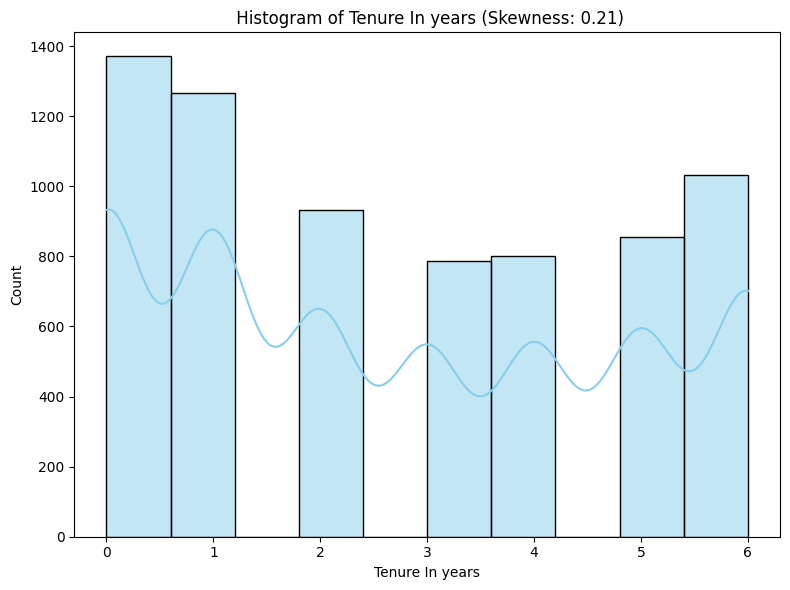

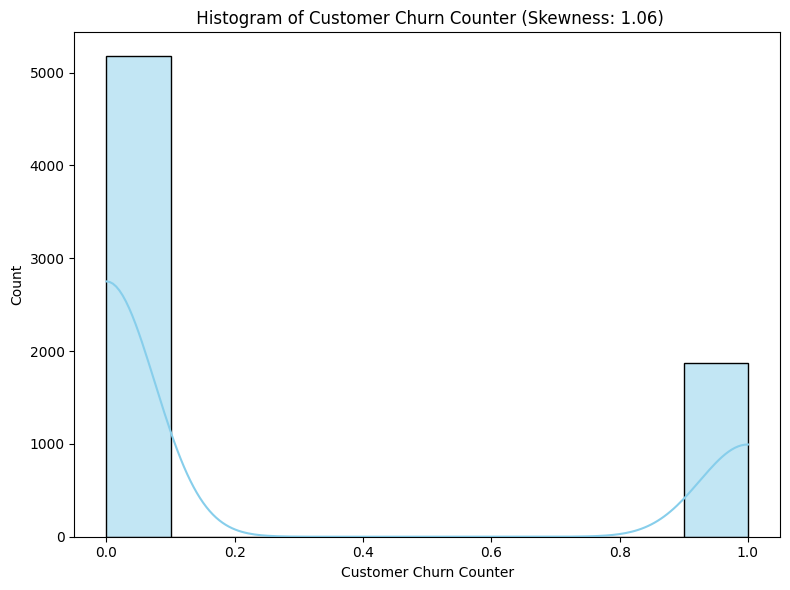

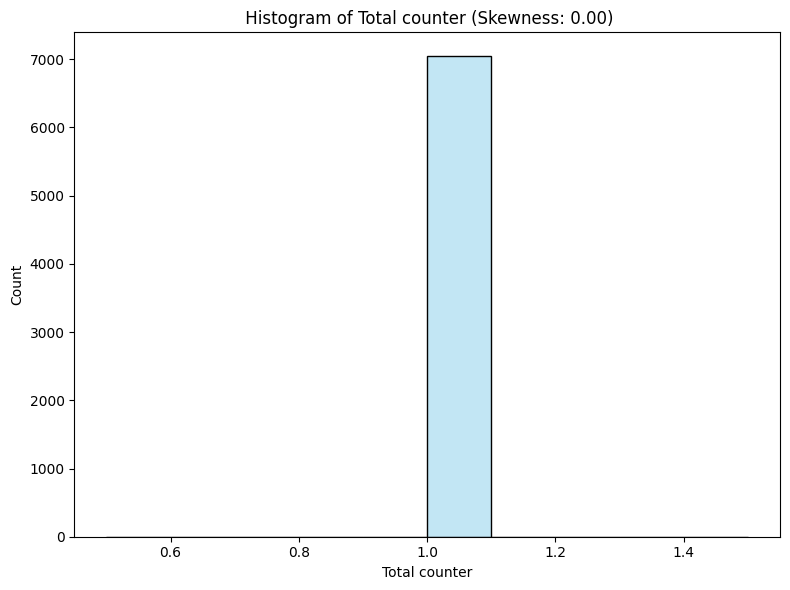

In [36]:
df_features = df.select_dtypes(exclude='object')

for col in df_features:
    skew = df_features[col].skew()

    plt.figure(figsize=(8,6))
    sns.histplot(x = df_features[col], bins = 10, color='skyblue', kde = True)
    plt.title(f' Histogram of {col} (Skewness: {skew:.2f})')
    plt.tight_layout()
    plt.show()

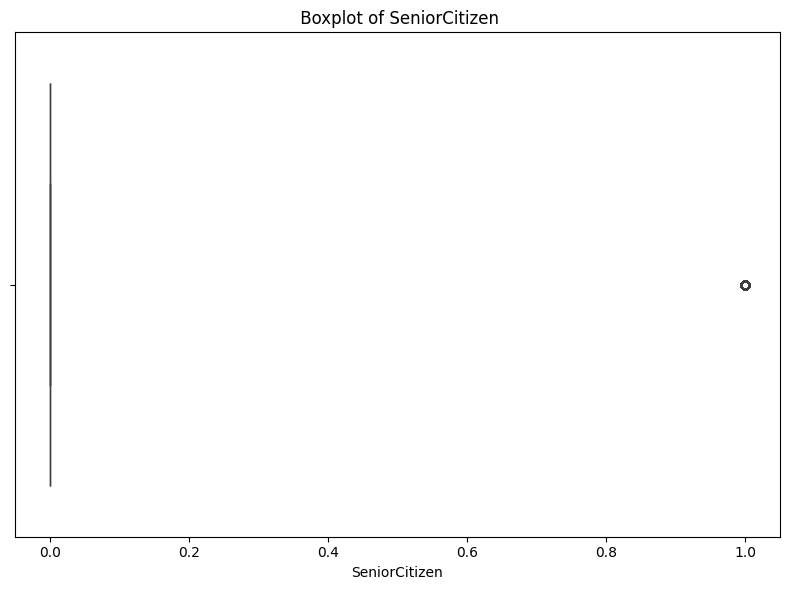

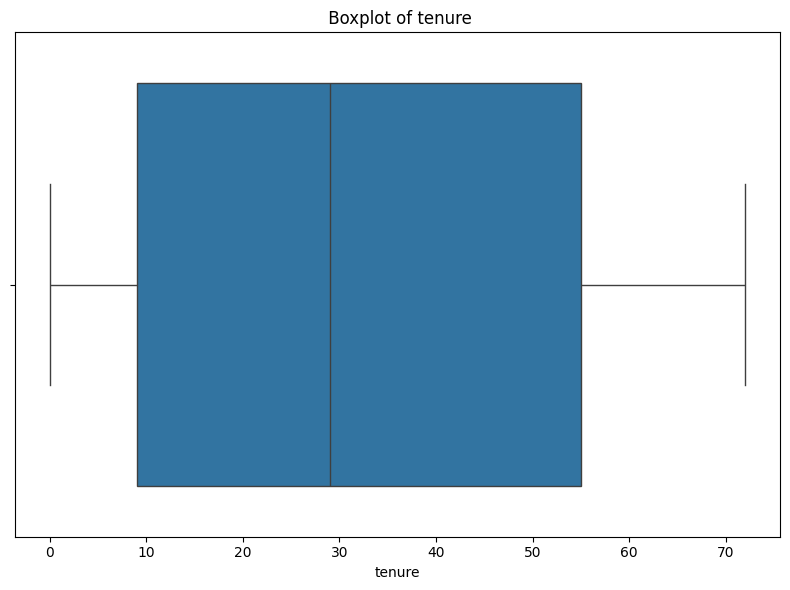

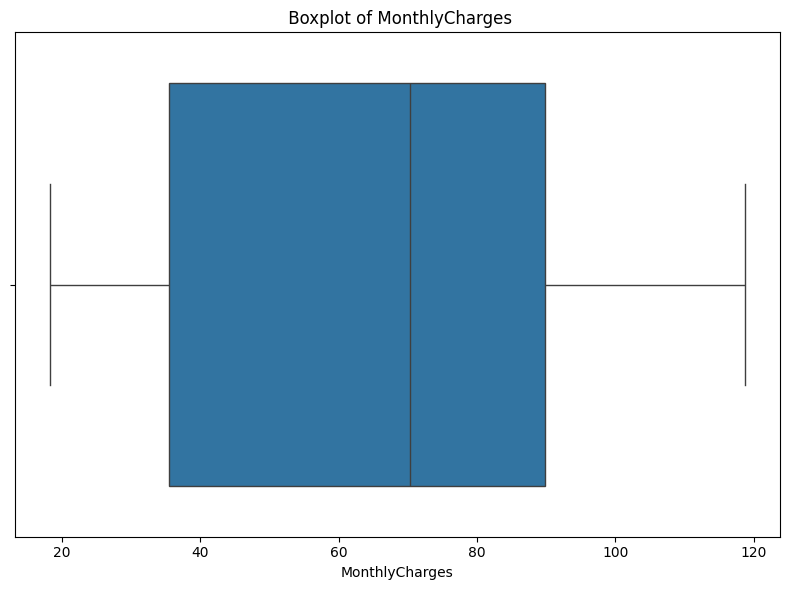

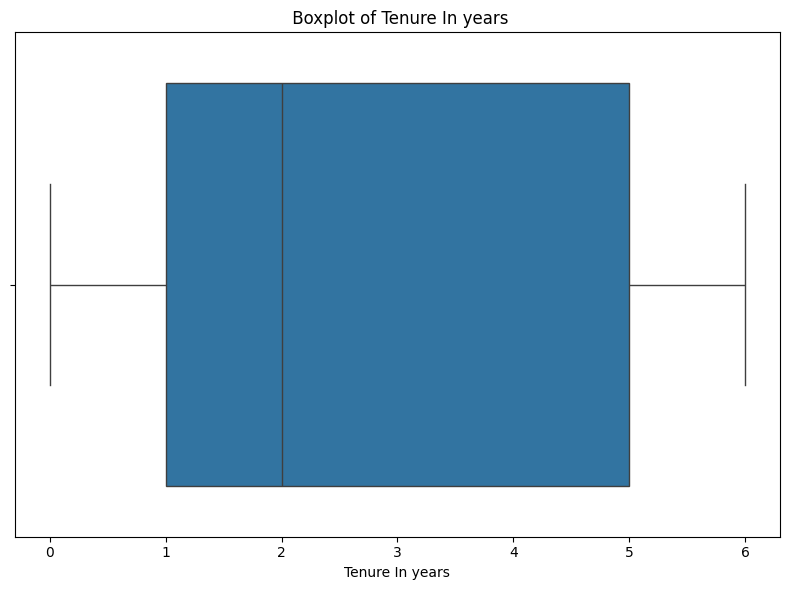

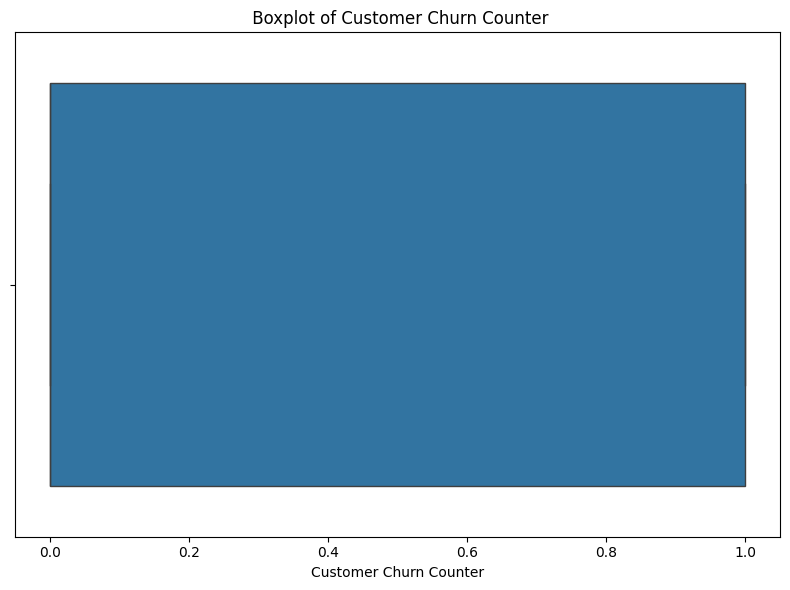

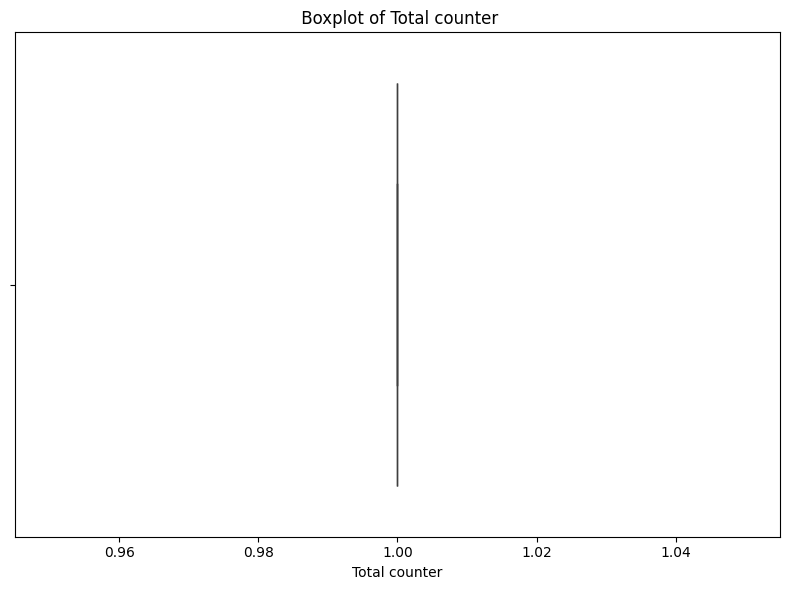

In [37]:
df_features = df.select_dtypes(exclude='object')

for col in df_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = df_features[col])
    plt.title(f' Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [38]:
# Drop unwanted columns
df.drop(columns=['customerID', 'Customer Churn Counter', 'Total counter', 'Tenure In years'], inplace=True, errors='ignore')


In [39]:
 #Clean TotalCharges (convert blank strings to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [40]:
# Separate features and target
X = df.drop(columns='Churn')
Y = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
#  separated categorical and numeric columns, scaled numeric features, and encoded categories using a ColumnTransformer pipeline.”

In [41]:
# Define categorical and numeric columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [42]:
# Create preprocessing pipeline
onehot = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
scaler = StandardScaler()
#standardizes numeric features
#ColumnTransformer runs both at once and returns a numeric matrix for the model.
preprocessor = ColumnTransformer([
    ('cat', onehot, cat_cols),
    ('num', scaler, num_cols)
])

## Train-test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
#  Fit preprocessor and transform data
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)


In [ ]:
# handle complex relationship and high accuracy

## Model Building

In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train_prep, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [46]:
y_train_pred = xgb.predict(X_train_prep)
y_test_pred = xgb.predict(X_test_prep)

In [47]:
# Train & Test Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("🎯 Train Accuracy:", round(train_acc, 4))
print("🧠 Test Accuracy:", round(test_acc, 4))


🎯 Train Accuracy: 0.8694
🧠 Test Accuracy: 0.7999


In [48]:
# Confusion Matrix & Classification Report
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\n Classification Report:\n", classification_report(y_test, y_test_pred))



 Confusion Matrix:
 [[927 109]
 [173 200]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.65      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [49]:
#Save model and preprocessor
joblib.dump(xgb, "telecom_churn_model.joblib")
joblib.dump(preprocessor, "telecom_preprocessor.joblib")

print("\n Model and preprocessor saved successfully!")



 Model and preprocessor saved successfully!


In [53]:
model = joblib.load("telecom_churn_model.joblib")
preprocessor_loaded = joblib.load("telecom_preprocessor.joblib")


In [51]:
#  Test with new data

sample = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 20,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.35,
    'TotalCharges': 1500.50
}])

sample_encoded = preprocessor_loaded.transform(sample)
prediction = model.predict(sample_encoded)[0]
label = "Yes (Will Churn)" if prediction == 1 else "No (Will Stay)"
print("\n🔍 Prediction for Sample Customer:", label)


🔍 Prediction for Sample Customer: No (Will Stay)
